On August 28th I rerun the boundaries to make sure they are correct.
Then I rerun again with smaller grids and smaller grid bins. For the 0-2 100 5 constraints, rerun again with more iterations required for convergence and different prob_par and prob_replace.

#scriptssyn: 08d09665187a35708e14036a89612b77854609ac (the boundary search had been run with the previous commit, which is exactly the same as this one for the functions needed to run the boundary search)
#shared (utilsGRF) 1669d79fa418fa4561de9ef72f9bfd6fe7258262

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os,re
sys.path.append("../../../work2/shared/utilsGRF/")
sys.path.append("../../../work2/ownutils/scriptssyn/")
import basic
import utils_boundariessyn
import AnalyseBoundarysearch
from shutil import copyfile
sys.path.append("./bin/")
import pandas as pd
import BoundaryFinder as BF
import matplotlib as mpl
import PolAB_A_allpars
import alphashape
import json

In [3]:
allcases=["difAD_difbnp","difAD_samebnp","difAD_samebnp_step12","difAD_samebnp_step13","difAD_samebnp_step23","difAD_samebnp_step11","difAD_samebnp_step22"]


difAD_difbnp_fcd=0.01_fcu=100_fc1=5_fc2=5
[0, 1, 2, 3, 4, 5, 6, 7, 8]
Processing [0, 1, 2, 3, 4, 5, 6, 7, 8]


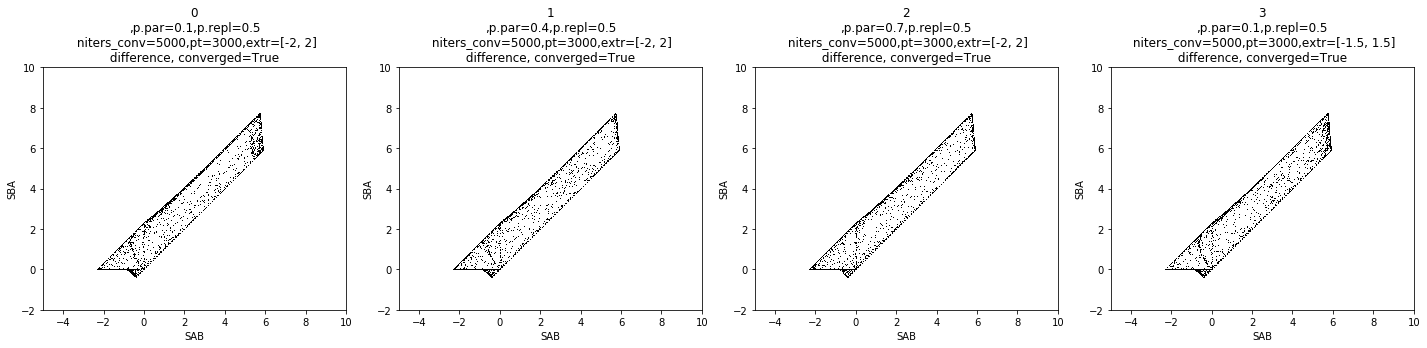

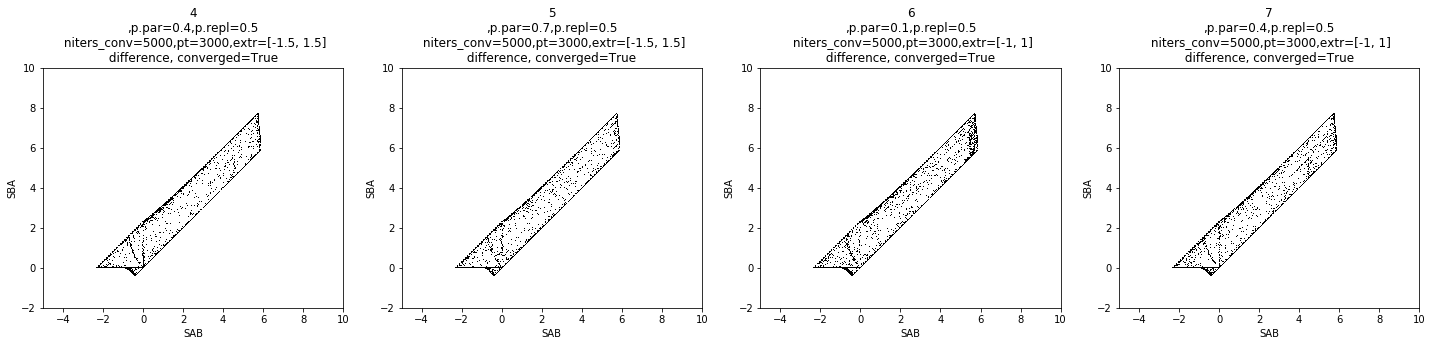

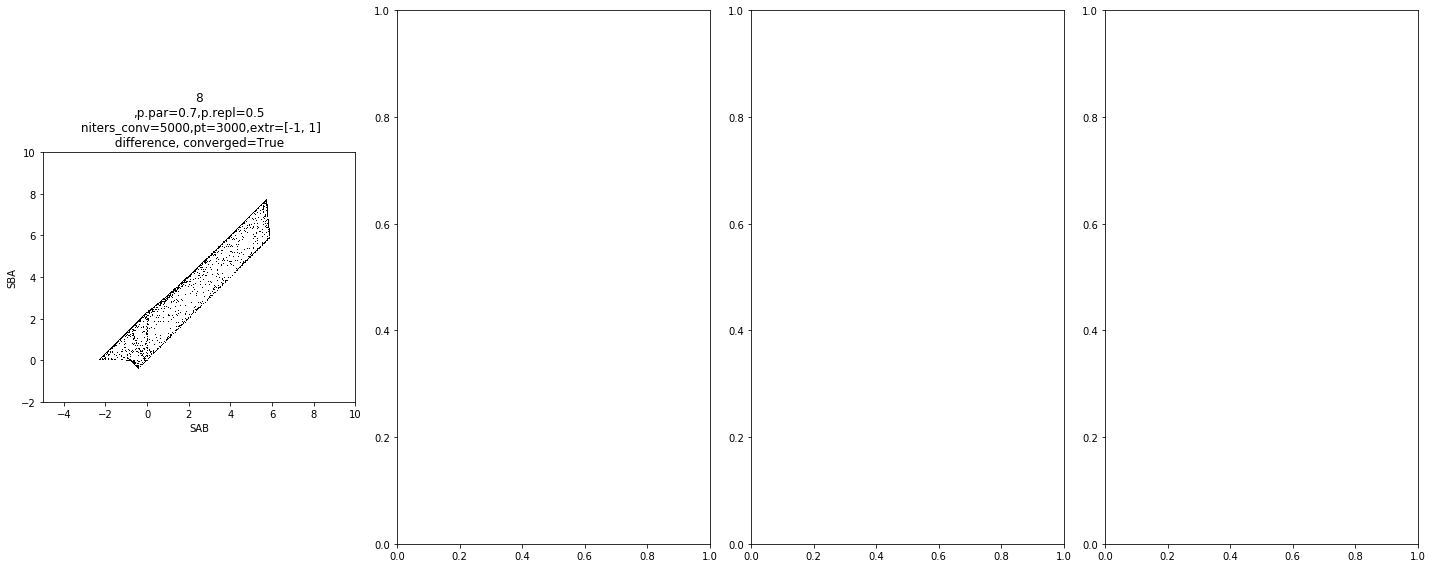

(601, 751)
difAD_samebnp_fcd=0.01_fcu=100_fc1=5_fc2=5
[9, 10, 11, 12, 13, 14, 15, 16, 17]
Processing [9, 10, 11, 12, 13, 14, 15, 16, 17]


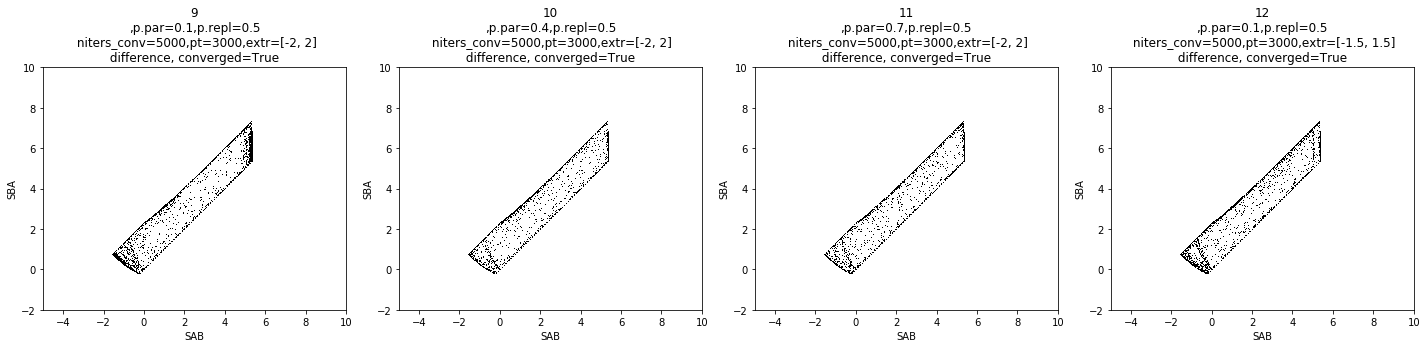

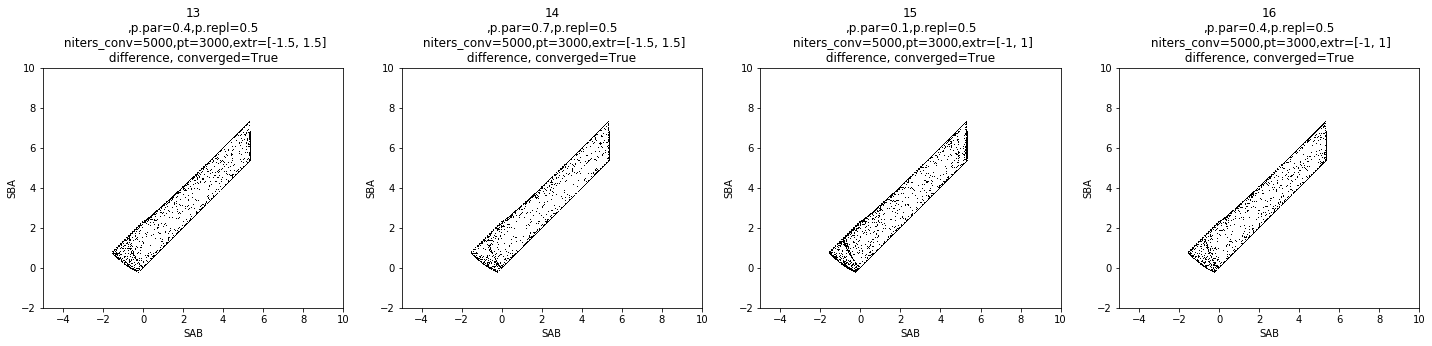

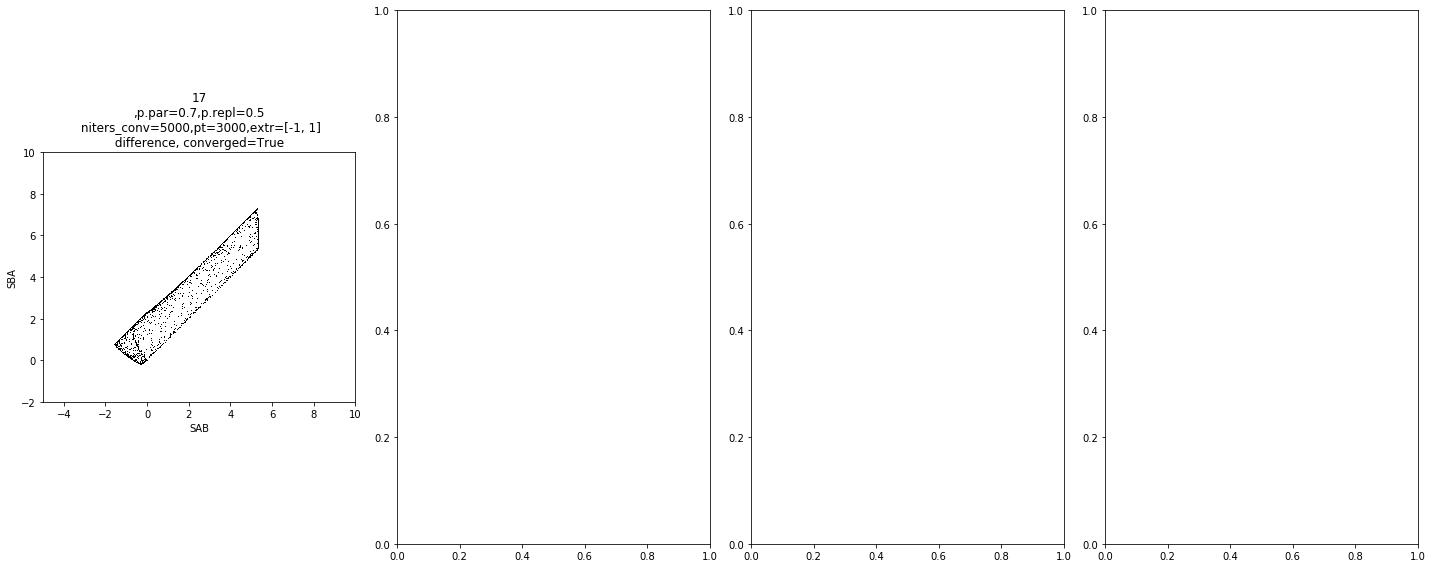

(601, 751)
difAD_samebnp_step12_fcd=0.01_fcu=100_fc1=5_fc2=5
[18, 19, 20, 21, 22, 23, 24, 25, 26]
Processing [18, 19, 20, 21, 22, 23, 24, 25, 26]


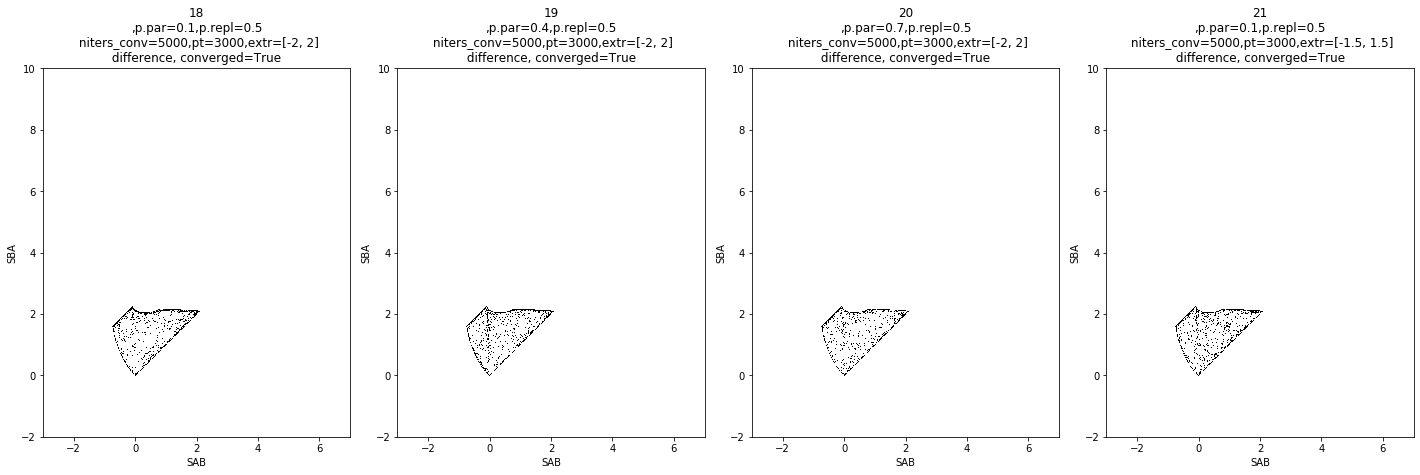

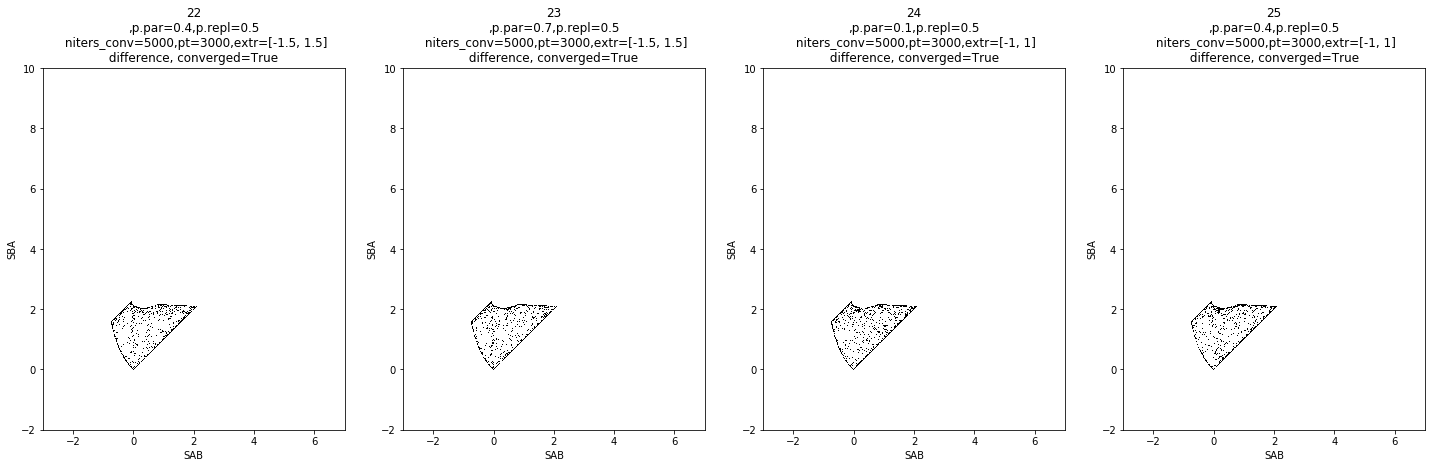

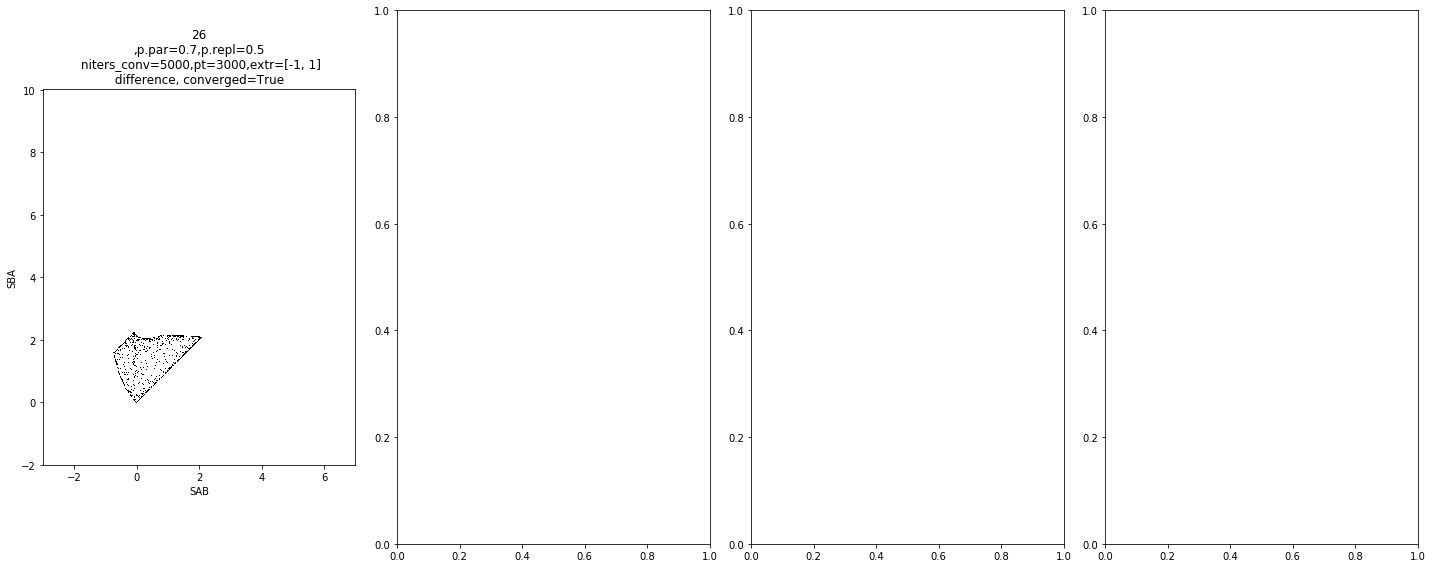

(802, 668)
difAD_samebnp_step13_fcd=0.01_fcu=100_fc1=5_fc2=5
[27, 28, 29, 30, 31, 32, 33, 34, 35]
Processing [27, 28, 29, 30, 31, 32, 33, 34, 35]


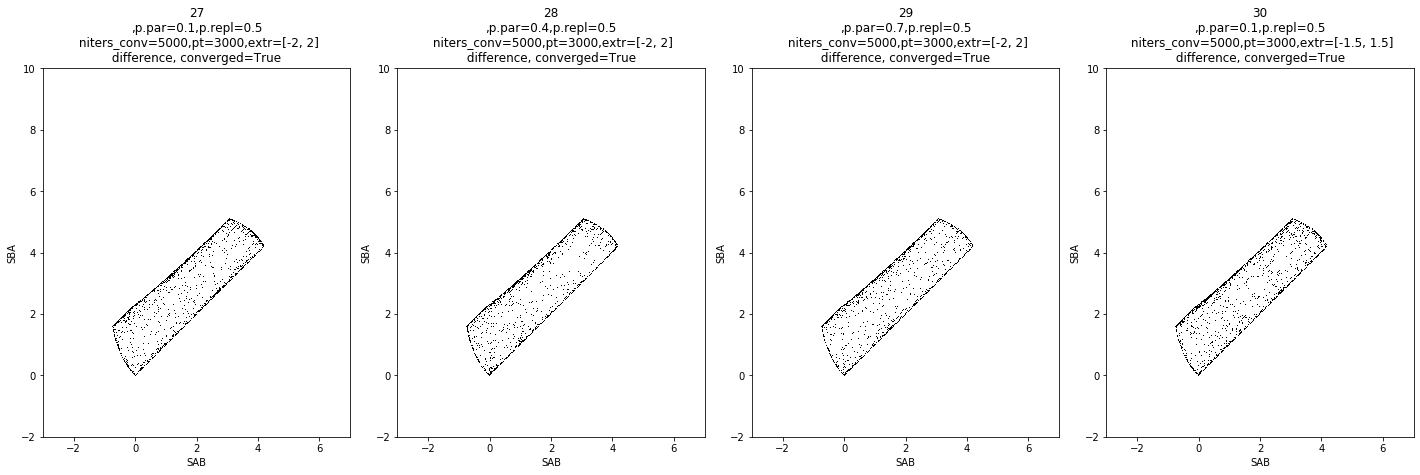

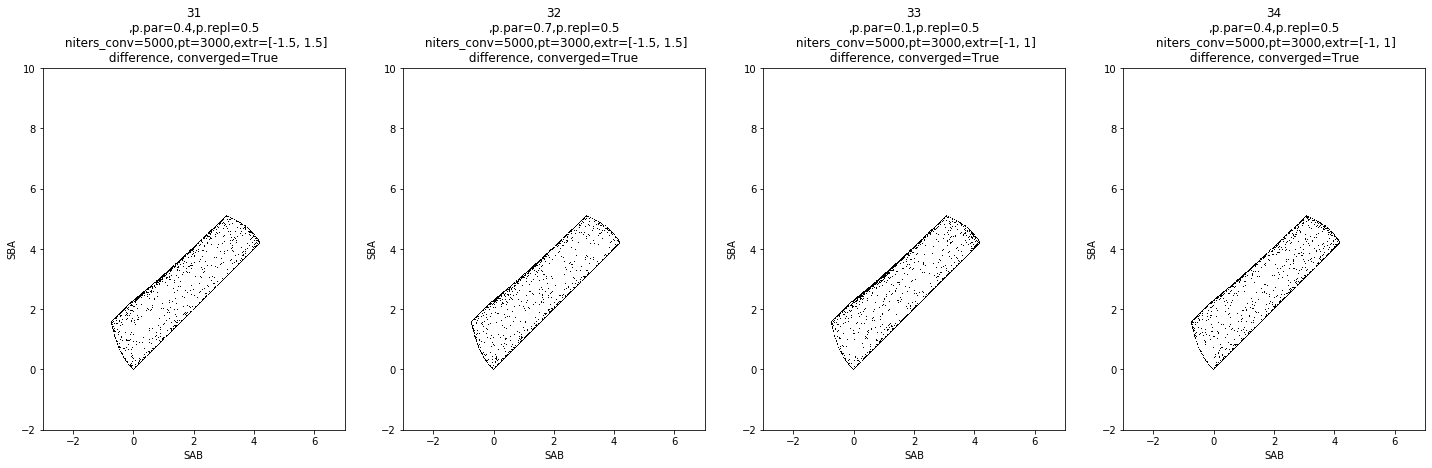

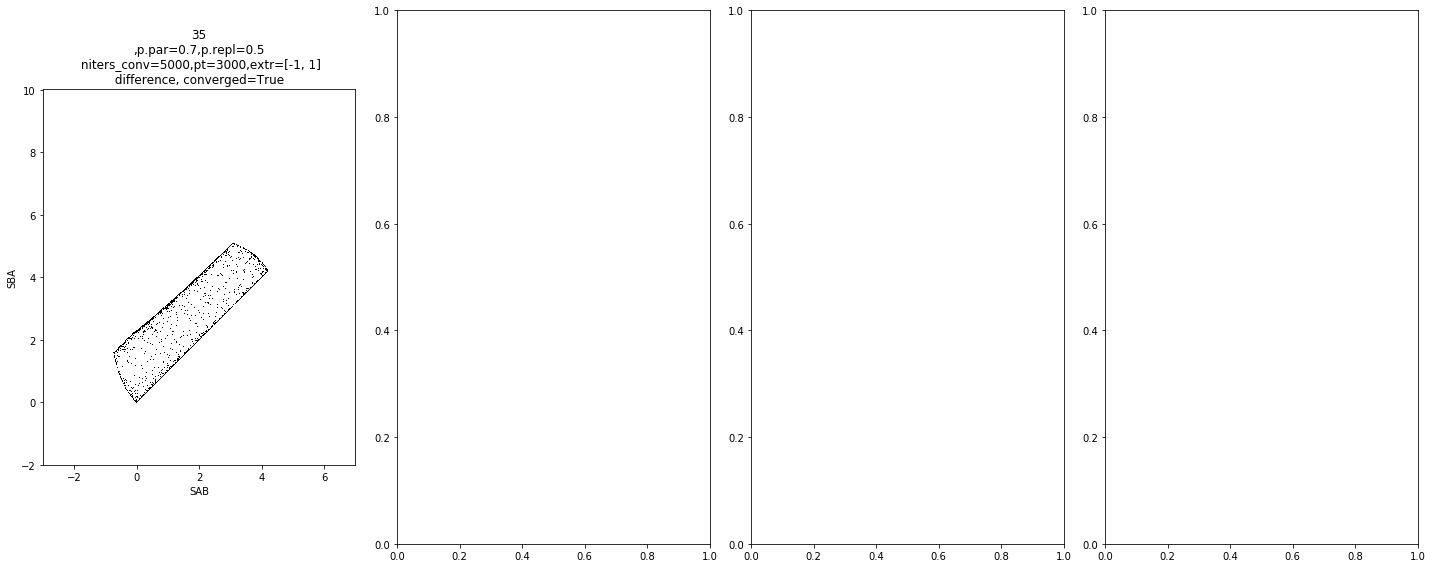

(802, 668)
difAD_samebnp_step23_fcd=0.01_fcu=100_fc1=5_fc2=5
[36, 37, 38, 39, 40, 41, 42, 43, 44]
Processing [36, 37, 38, 39, 40, 41, 42, 43, 44]


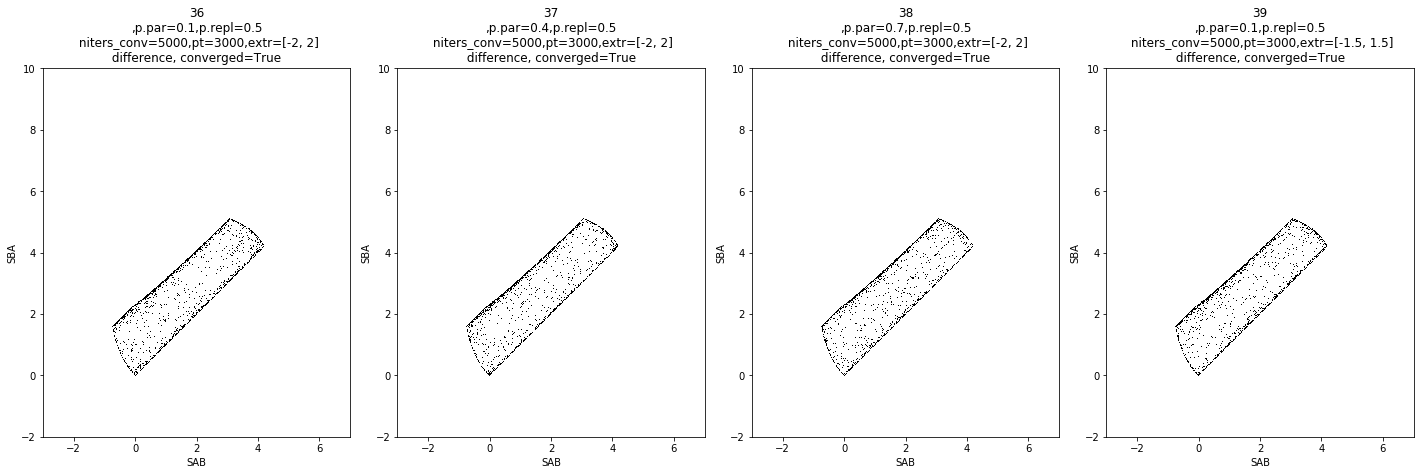

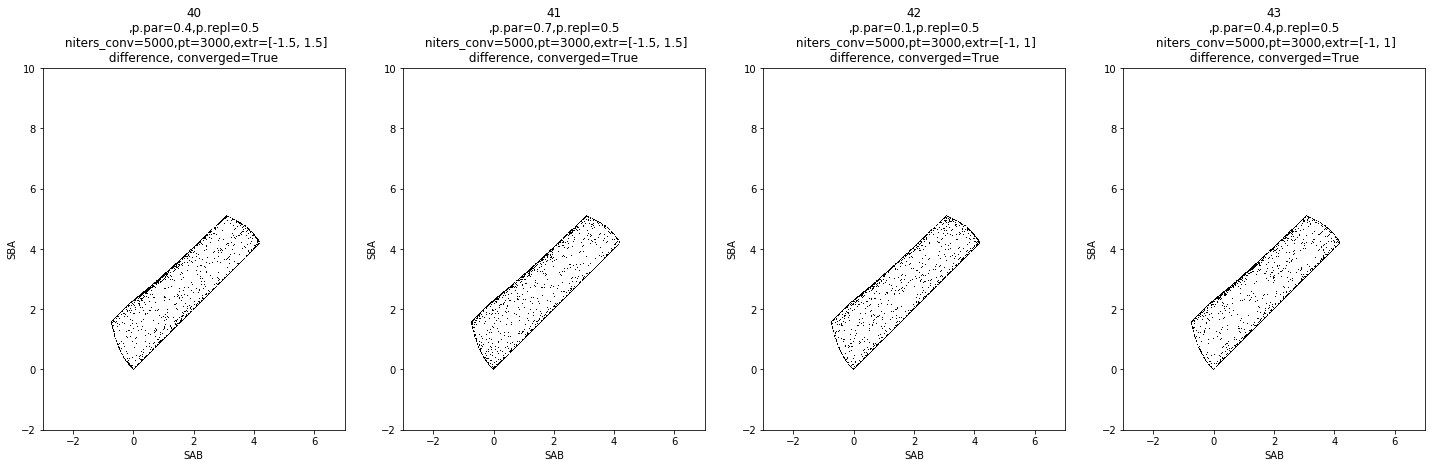

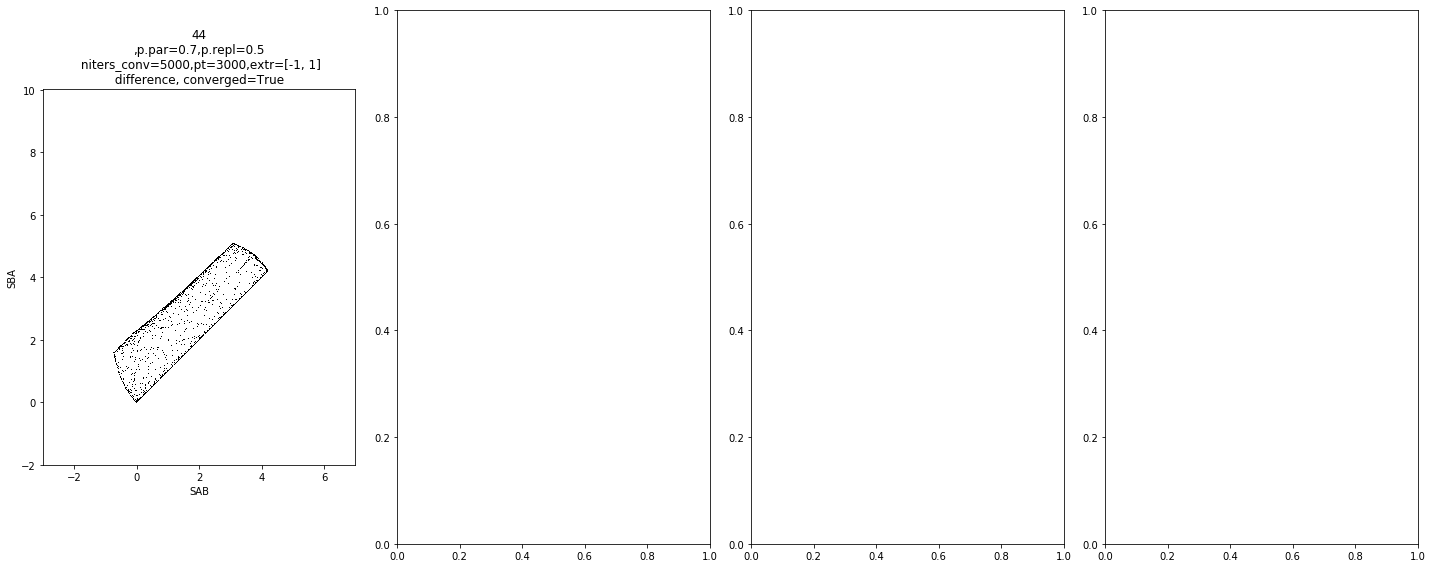

(802, 668)
difAD_samebnp_step11_fcd=0.01_fcu=100_fc1=5_fc2=5
[45, 46, 47, 48, 49, 50, 51, 52, 53]
Processing [45, 46, 47, 48, 49, 50, 51, 52, 53]


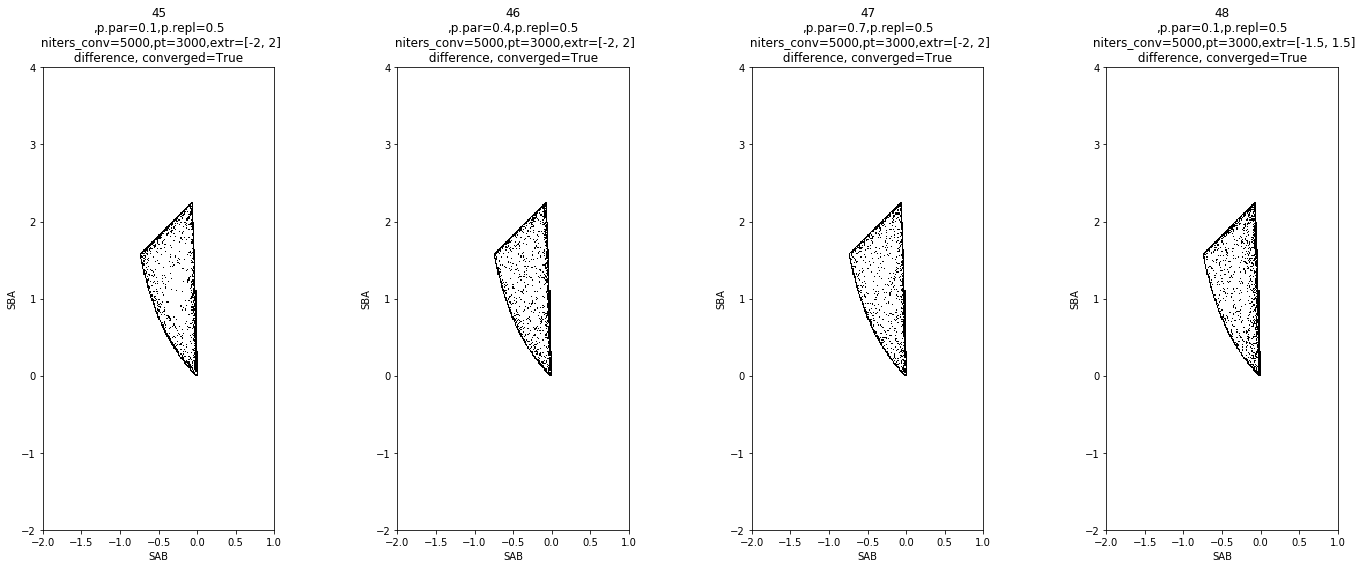

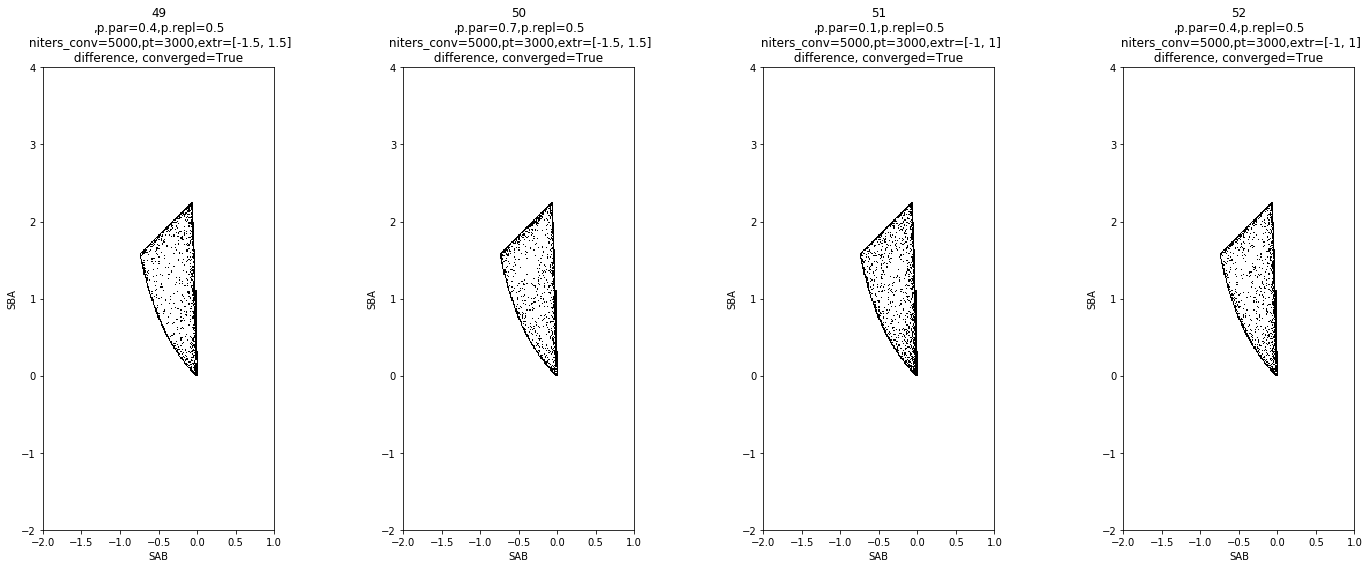

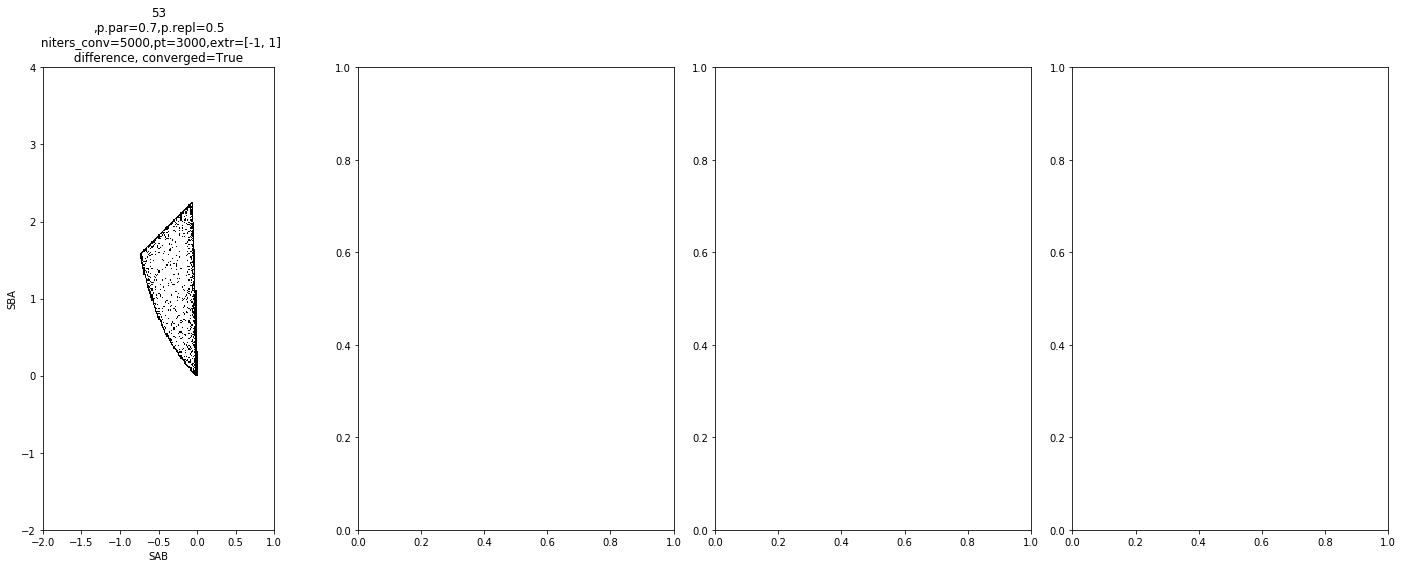

(401, 201)
difAD_samebnp_step22_fcd=0.01_fcu=100_fc1=5_fc2=5
[54, 55, 56, 57, 58, 59, 60, 61, 62]
Processing [54, 55, 56, 57, 58, 59, 60, 61, 62]


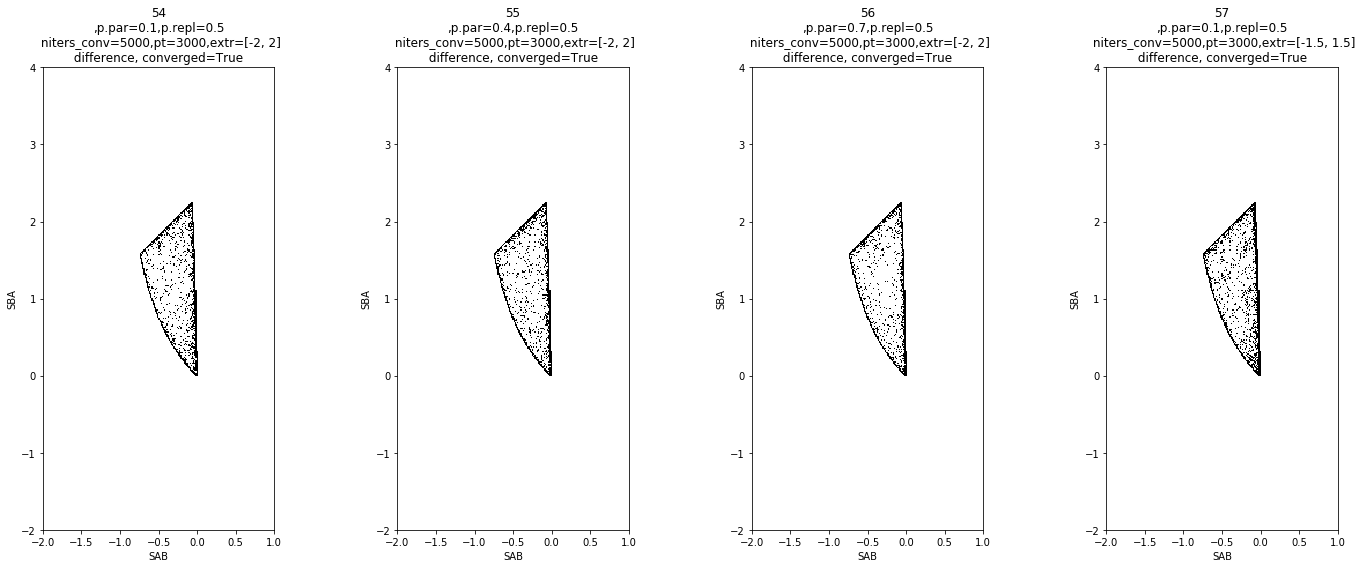

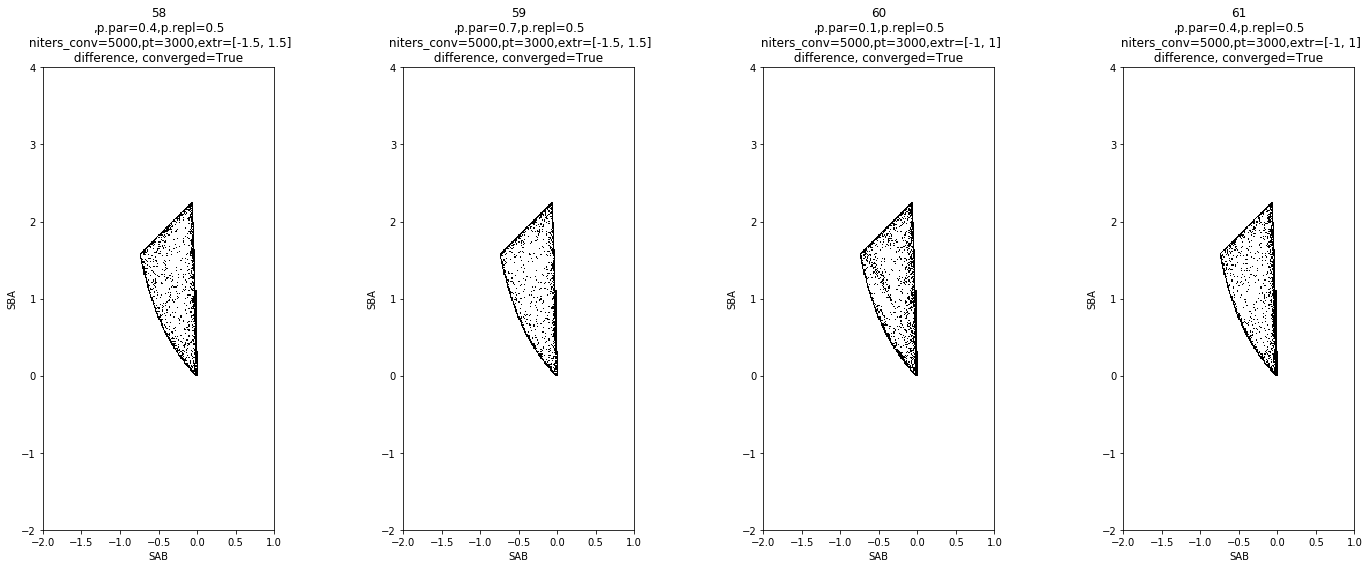

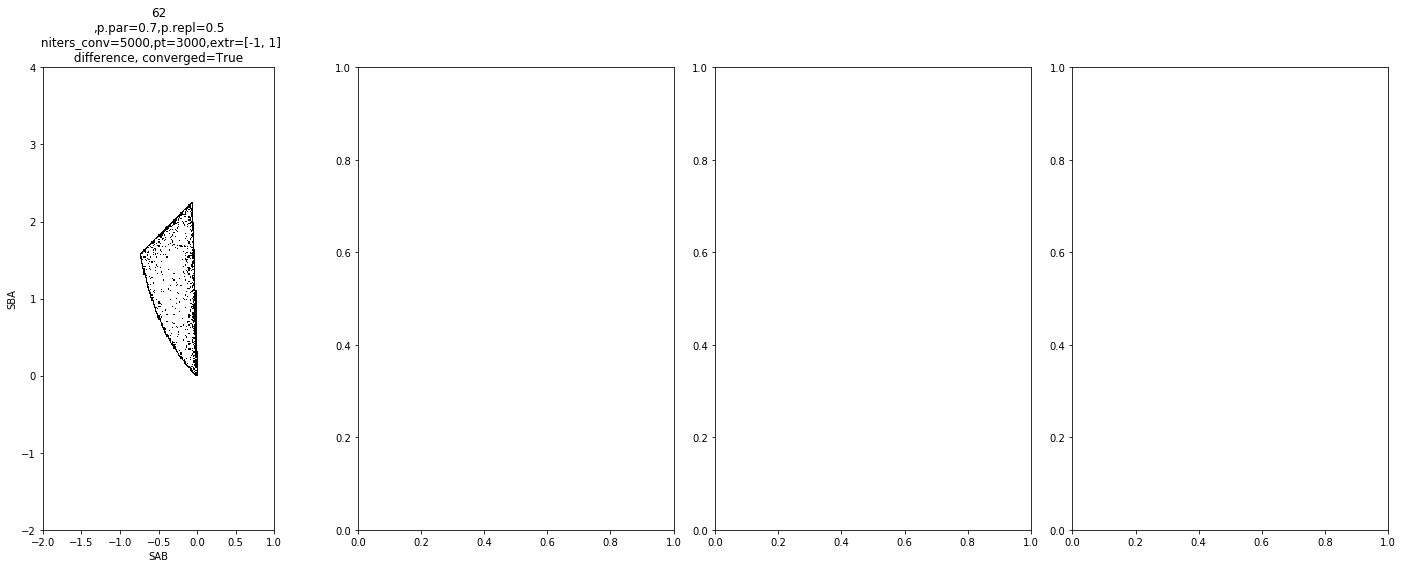

(401, 201)


In [4]:
folder="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-kinsynsub1/2020_09_09_repeatboundaries_0_2_100_5"

fcd=0.01
fcu=100
fullnames=[]
allouts0=dict()
allouts=allouts0
fc1list=[5]
for case in allcases:
    allouts[case]=dict()
    fldr=folder
    if case in ["difAD_difbnp","difAD_samebnp"]:
        jid="17653598"
    elif case in ["difAD_samebnp_step12","difAD_samebnp_step13","difAD_samebnp_step23"]:
        jid="17653599"
    else:
        jid="17653600"
    #fldr=os.path.join(folder,case)
    for fc1 in fc1list:
        fc2=fc1
        fc1_fc2="fc1=%g_fc2=%g"%(fc1,fc2)
        basename=case+"_fcd=%g_fcu=%g_"%(fcd,fcu)+fc1_fc2
        print(basename)
        out=AnalyseBoundarysearch.plot_boundaries_search(fldr=fldr,getallpoints=True,printtocheck=False,final=True,septime=" ",jid_num=jid,basename=basename,xlabel='SAB',ylabel='SBA')
        allouts[case][fc1_fc2]=out

In [5]:
for case in allouts.keys():
    if case in ["difAD_difbnp","difAD_samebnp"]:
        gridspacing=0.02
    else:
        gridspacing=0.015
    minidict=dict()
    minidict[case]=allouts[case]
    utils_boundariessyn.check_constraints(minidict,100,0.01,gridspacing=gridspacing,nchoice=1000,fGRF=PolAB_A_allpars.interface_GRF_PolAB_A_A)

difAD_difbnp fc1=5_fc2=5
difAD_samebnp fc1=5_fc2=5
difAD_samebnp_step12 fc1=5_fc2=5
difAD_samebnp_step13 fc1=5_fc2=5
difAD_samebnp_step23 fc1=5_fc2=5
difAD_samebnp_step11 fc1=5_fc2=5
difAD_samebnp_step22 fc1=5_fc2=5


difAD_difbnp fc1=5_fc2=5
1


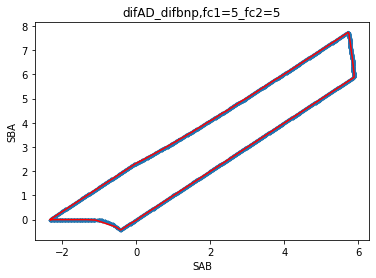

0.5
0.1
difAD_samebnp fc1=5_fc2=5
1


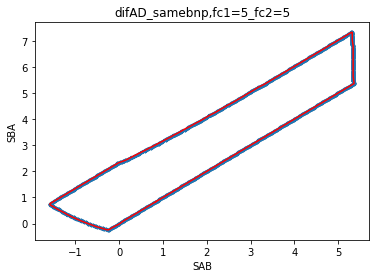

0.5
0.1
difAD_samebnp_step12 fc1=5_fc2=5
50


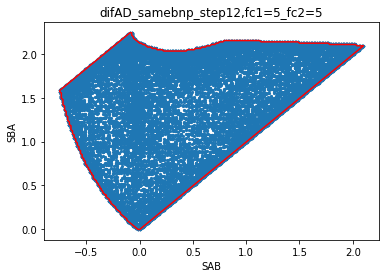

10
difAD_samebnp_step13 fc1=5_fc2=5
1


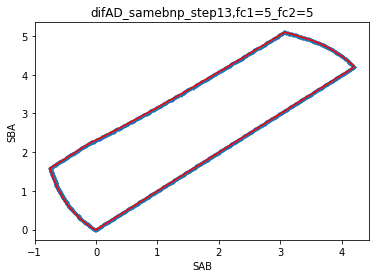

0.5
0.1
difAD_samebnp_step23 fc1=5_fc2=5
1


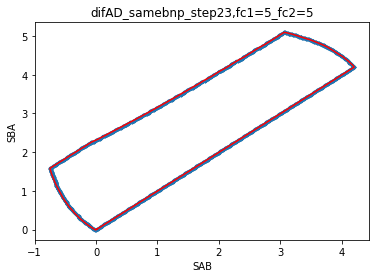

0.5
0.1
difAD_samebnp_step11 fc1=5_fc2=5
1


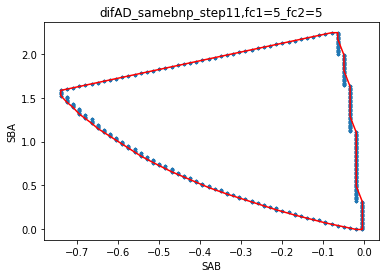

0.5
0.1
difAD_samebnp_step22 fc1=5_fc2=5
1


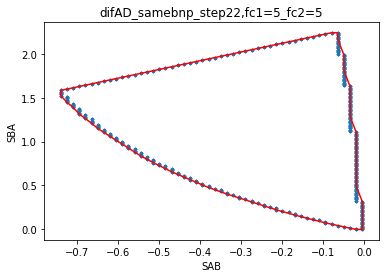

0.5
0.1


In [6]:
allashapes=utils_boundariessyn.find_boundaryline(allouts)

In [7]:
dict_points=dict()

for key1 in allashapes.keys():
    dict_points[key1]=dict()
    for key2 in allashapes[key1].keys():
        #dict_points[key1][key2]=dict()
        #for key3 in allashapes[key1][key2].keys():
        ashape=allashapes[key1][key2]
            
        xp,yp=ashape.exterior.xy
        dict_points[key1][key2]={'x':list(xp),'y':list(yp)}

#save as json for future time

filename='./files/ashapes_0_2_100_5_run0909.json'
json_string = json.dumps(dict_points)
datastore = json.loads(json_string)
with open(filename, 'w') as f:
    json.dump(datastore, f)

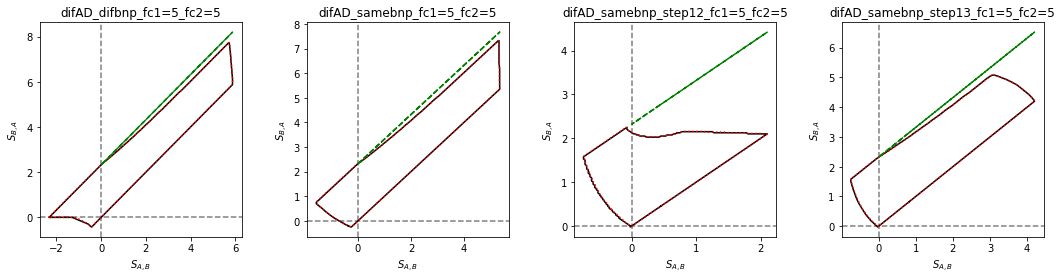

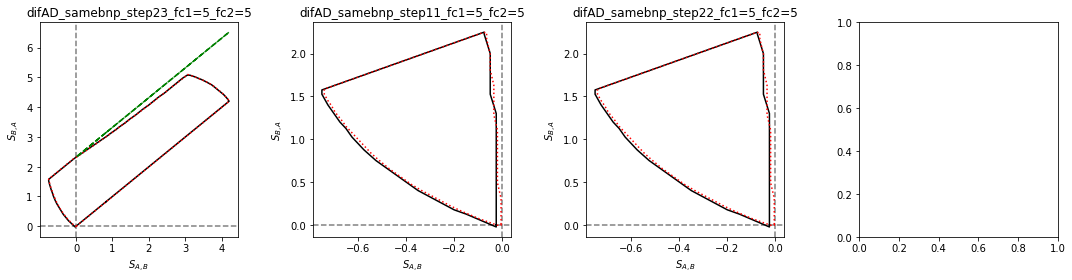

In [8]:
filename='./files/ashapes_0_2_100_10_or_5_run0828.json'
ashapes_old=json.load(open(filename,'r'))
ashapes_new=dict_points
n=0
for case in allcases:
    
    old=ashapes_old[case]
    new=ashapes_new[case]
    for fc in new.keys():
        old_=old[fc]
        new_=new[fc]
        if n==0 or n%4==0:
            if n>0:
                plt.tight_layout()
                plt.show()
            fig,axes=plt.subplots(1,4,figsize=(15,4))
        ax=axes[n%4]
        ax.axvline(x=0,linestyle="--",color="gray")
        ax.axhline(y=0,linestyle="--",color="gray")

        ax.plot(old_['x'],old_['y'],color='k',label="old")
        ax.plot(new_['x'],new_['y'],color='r',linestyle=':',label="new")
        ax.set_title(case+"_"+fc)
        xar=np.array(old_['x'])
        mask=xar>0
        fc2=float(fc.split("=")[-1])
        log2fc2=np.log2(fc2)
        ax.plot(xar[mask],(xar+log2fc2)[mask],color='green',linestyle="--")
        ax.set_xlabel(r"$S_{A,B}$")
        ax.set_ylabel(r"$S_{B,A}$")
        n+=1
plt.tight_layout()
plt.show()

The results are essentially indistinguishable even if running for longer. 